# KDD e Cria√ß√£o do Modelo de Classifica√ß√£o de Complexidade

**Objetivo:** Este notebook tem como objetivo realizar um processo completo de Descoberta de Conhecimento em Dados (KDD) sobre o dataset de chamadas de emerg√™ncia. O resultado final ser√° um modelo de Machine Learning treinado, capaz de classificar uma chamada como "Simples" ou "Complexa" com base em suas caracter√≠sticas, para ser utilizado por um agente de IA em um ambiente de simula√ß√£o.

**Etapas:**
1.  **Carregamento e Limpeza dos Dados:** Leitura do dataset e tratamento de valores ausentes e inconsist√™ncias.
2.  **Engenharia de Features:** Cria√ß√£o da nossa vari√°vel alvo (`Complexity`) a partir da dura√ß√£o total da chamada.
3.  **An√°lise Explorat√≥ria de Dados (EDA):** Visualiza√ß√£o e an√°lise dos dados para extrair insights.
4.  **Pr√©-processamento:** Prepara√ß√£o dos dados para o modelo (codifica√ß√£o de vari√°veis categ√≥ricas).
5.  **Treinamento, Otimiza√ß√£o de Modelos e Balanceamento de Classes:** Aplica√ß√£o dos algoritmos de treinamento, t√©cnicas de balanceamento, otimiza√ß√£o dos hiperpar√¢metros e Tuning.
6.  **Avalia√ß√£o de Modelos:** Avalia√ß√£o da performance dos modelos de treinamento (Logistic Regression, Random Forest).
7.  **Conclus√£o e Exporta√ß√£o do Modelo:** Escolha do melhor modelo e salvamento para uso futuro.

# 1. Configura√ß√µes iniciais do projeto

## Instala√ß√£o das bibliotecas

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


import joblib # Para salvar o modelo

# Configura√ß√µes de visualiza√ß√£o
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
pd.options.display.float_format = '{:,.2f}'.format

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


## Carregamento de dados

In [118]:
# Caminho para o arquivo CSV
file_path = '../data/raw/Fire_Department_and_Emergency_Medical_Services_Dispatched_Calls_for_Service_20250904.csv'

try:
    # Usar engine='python' para evitar ParserError comuns em CSVs complexos
    df = pd.read_csv(file_path, engine='python')
    print(f"Dataset carregado com sucesso! Formato: {df.shape}")
except FileNotFoundError:
    print(f"Erro: O arquivo n√£o foi encontrado no caminho especificado: {file_path}")
except Exception as e:
    print(f"Ocorreu um erro inesperado ao ler o arquivo: {e}")

# Visualizar as primeiras linhas e informa√ß√µes b√°sicas
if 'df' in locals():
    display(df.head())
    display(df.info())

Dataset carregado com sucesso! Formato: (242828, 36)


Call Number Unit ID  Incident Number         Call Type   Call Date  \
0    250020258     T15         25000638  Medical Incident  01/02/2025   
1    250020501     B04         25000702            Alarms  01/02/2025   
2    250022953     T08         25001078            Alarms  01/02/2025   
3    250022603     E14         25001024            Alarms  01/02/2025   
4    250020285   AM122         25000649  Medical Incident  01/02/2025   

   Watch Date            Received DtTm               Entry DtTm  \
0  01/01/2025  2025 Jan 02 02:59:06 AM  2025 Jan 02 03:01:43 AM   
1  01/01/2025  2025 Jan 02 06:48:34 AM  2025 Jan 02 06:51:28 AM   
2  01/02/2025  2025 Jan 02 08:20:57 PM  2025 Jan 02 08:23:06 PM   
3  01/02/2025  2025 Jan 02 05:59:28 PM  2025 Jan 02 06:02:01 PM   
4  01/01/2025  2025 Jan 02 03:27:26 AM  2025 Jan 02 03:29:13 AM   

             Dispatch DtTm            Response DtTm  ... Number of Alarms  \
0  2025 Jan 02 03:01:48 AM  2025 Jan 02 03:04:39 AM  ...                1   
1  2025 Jan 02 06:51:34 AM  2025 Jan 02 06:54:05 AM  ...                1   
2  2025 Jan 02 08:23:15 PM  2025 Jan 02 08:24:31 PM  ...                1   
3  2025 Jan 02 06:02:51 PM  2025 Jan 02 06:04:09 PM  ...                1   
4  2025 Jan 02 03:29:41 AM  2025 Jan 02 03:31:03 AM  ...                1   

  Unit Type Unit sequence in call dispatch Fire Prevention District  \
0     TRUCK                           1.00                     9.00   
1     CHIEF                           3.00                     4.00   
2     TRUCK                           3.00                     3.00   
3    ENGINE                           3.00                     7.00   
4   PRIVATE                           2.00                    10.00   

  Supervisor District Neighborhooods - Analysis Boundaries            RowID  \
0               11.00                            Excelsior    250020258-T15   
1                2.00                               Marina    250020501-B04   
2                6.00                      South of Market    250022953-T08   
3                1.00                       Outer Richmond    250022603-E14   
4                9.00                              Portola  250020285-AM122   

                         case_location               data_as_of  \
0  POINT (-122.425547474 37.725322562)  2025 Jan 02 03:32:08 AM   
1  POINT (-122.437514361 37.798742207)  2025 Jan 03 03:18:49 AM   
2  POINT (-122.393857286 37.777977132)  2025 Jan 03 03:18:49 AM   
3  POINT (-122.481791172 37.784028238)  2025 Jan 03 03:18:49 AM   
4  POINT (-122.402108391 37.724035614)  2025 Jan 03 03:18:49 AM   

            data_loaded_at  
0  2025 Jan 09 04:18:22 AM  
1  2025 Jan 10 04:22:32 AM  
2  2025 Jan 10 04:22:32 AM  
3  2025 Jan 10 04:22:32 AM  
4  2025 Jan 10 04:22:32 AM  

[5 rows x 36 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242828 entries, 0 to 242827
Data columns (total 36 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Call Number                           242828 non-null  int64  
 1   Unit ID                               242828 non-null  object 
 2   Incident Number                       242828 non-null  int64  
 3   Call Type                             242828 non-null  object 
 4   Call Date                             242828 non-null  object 
 5   Watch Date                            242828 non-null  object 
 6   Received DtTm                         242828 non-null  object 
 7   Entry DtTm                            242828 non-null  object 
 8   Dispatch DtTm                         242828 non-null  object 
 9   Response DtTm                         236229 non-null  object 
 10  On Scene DtTm                         189466 non-null  object 
 11  

None

## Limpeza e pr√©-processamento dos dados

In [119]:
print("Iniciando a limpeza dos dados...")

# 1. Selecionar todas as colunas necess√°rias
colunas_relevantes = [
    'Call Type',
    'Call Type Group',
    'Original Priority', # Feature chave que estamos reintroduzindo
    'Final Priority',
    'Received DtTm',
    'Available DtTm'
]
df_clean = df[colunas_relevantes].copy()

# 2. Converter colunas de data/hora e remover nulos
for col in ['Received DtTm', 'Available DtTm']:
    df_clean[col] = pd.to_datetime(df_clean[col], errors='coerce')
df_clean.dropna(subset=colunas_relevantes, inplace=True)

# 3. Calcular a DURA√á√ÉO TOTAL DO INCIDENTE em minutos
df_clean['Incident Duration (minutes)'] = (df_clean['Available DtTm'] - df_clean['Received DtTm']).dt.total_seconds() / 60.0
df_clean = df_clean[df_clean['Incident Duration (minutes)'] > 0]

# 4. Garantir que as prioridades sejam tratadas corretamente
df_clean['Final Priority'] = pd.to_numeric(df_clean['Final Priority'], errors='coerce')
df_clean['Original Priority'] = pd.to_numeric(df_clean['Original Priority'], errors='coerce') # Garantir que seja num√©rico
df_clean.dropna(subset=['Final Priority', 'Original Priority'], inplace=True)

print("Limpeza finalizada. Formato do DataFrame limpo:", df_clean.shape)

Iniciando a limpeza dos dados...
Limpeza finalizada. Formato do DataFrame limpo: (192077, 7)


# 2. Engenharia de Features

## Defini√ß√£o da Complexidade

Ap√≥s uma an√°lise aprofundada, conclu√≠mos que usar apenas a dura√ß√£o da chamada como um proxy para a complexidade era uma simplifica√ß√£o que poderia levar a conclus√µes equivocadas. Um incidente m√©dico simples, por exemplo, poderia ter uma dura√ß√£o longa, enquanto um alarme de inc√™ndio (sempre complexo) poderia ser resolvido rapidamente (alarme falso).

Portanto, adotamos uma defini√ß√£o de complexidade h√≠brida e mais robusta, baseada em regras de neg√≥cio que refletem melhor a realidade operacional de um centro de emerg√™ncias. Esta abordagem cria uma vari√°vel alvo muito mais confi√°vel para o modelo aprender.

Uma chamada ser√° classificada como Complexa (1) se QUALQUER UMA das seguintes condi√ß√µes for verdadeira:

1. **Natureza Grave do Incidente**: O Call Type Group (Grupo do Tipo de Chamada) √© 'Fire' ou 'Alarms'. Estas s√£o situa√ß√µes que, por padr√£o, s√£o sempre tratadas como complexas e exigem despacho e verifica√ß√£o.

2. **Urg√™ncia Avaliada por Humanos**: A Final Priority (Prioridade Final) atribu√≠da por um operador √© 3 ou maior. Este crit√©rio utiliza o julgamento de um especialista humano como uma "verdade fundamental" para identificar emerg√™ncias.

3. **Dura√ß√£o Longa**: O Incident Duration (minutes) (Dura√ß√£o Total do Incidente) √© um outlier estat√≠stico superior. Esta regra captura qualquer tipo de chamada, mesmo as aparentemente simples, que por algum motivo se tornaram excepcionalmente longas e, portanto, complexas na pr√°tica.

Uma chamada s√≥ ser√° considerada Simples (0) se n√£o se encaixar em nenhum desses crit√©rios.

Definindo a vari√°vel alvo 'Complexity' com a regra final...
Chamadas complexas pela Regra 1 (Natureza): 10148
Chamadas complexas pela Regra 2 (Urg√™ncia): 144135
Chamadas complexas pela Regra 3 (Dura√ß√£o Anormal > 151.24 min): 2185

--- Distribui√ß√£o Final da vari√°vel 'Complexity' ---
Complexity
1   0.76
0   0.24
Name: proportion, dtype: float64


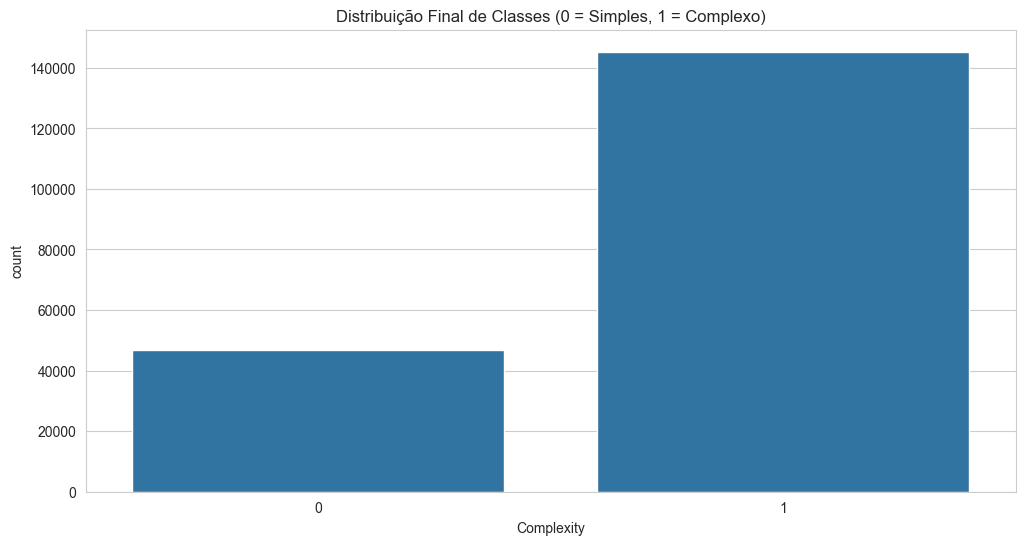

In [120]:
# --- L√≥gica de Complexidade Definitiva (H√≠brida e Robusta) ---

print("Definindo a vari√°vel alvo 'Complexity' com a regra final...")

# Crit√©rio 1: Natureza Grave (Grupo de Inc√™ndio ou Alarme)
rule1 = df_clean['Call Type Group'].isin(['Fire', 'Alarms'])
print(f"Chamadas complexas pela Regra 1 (Natureza): {rule1.sum()}")

# Crit√©rio 2: Urg√™ncia Avaliada por Humanos (Prioridade Final >= 3)
rule2 = (df_clean['Final Priority'] >= 3)
print(f"Chamadas complexas pela Regra 2 (Urg√™ncia): {rule2.sum()}")

# Crit√©rio 3: Dura√ß√£o Anormalmente Longa (Outlier Superior)
Q3 = df_clean['Incident Duration (minutes)'].quantile(0.75)
IQR = Q3 - df_clean['Incident Duration (minutes)'].quantile(0.25)
upper_bound = Q3 + 1.5 * IQR
rule3 = (df_clean['Incident Duration (minutes)'] > upper_bound)
print(f"Chamadas complexas pela Regra 3 (Dura√ß√£o Anormal > {upper_bound:.2f} min): {rule3.sum()}")

# Aplicar a l√≥gica OU: uma chamada √© COMPLEXA (1) se QUALQUER crit√©rio for verdadeiro
df_clean['Complexity'] = (rule1 | rule2 | rule3).astype(int)

# Verificar a nova distribui√ß√£o da vari√°vel
print("\n--- Distribui√ß√£o Final da vari√°vel 'Complexity' ---")
print(df_clean['Complexity'].value_counts(normalize=True))
sns.countplot(x='Complexity', data=df_clean)
plt.title('Distribui√ß√£o Final de Classes (0 = Simples, 1 = Complexo)')
plt.show()

# --- CORRE√á√ÉO AQUI ---
# Guardar o dataframe processado com TODAS as features necess√°rias para o modelo
df_processed = df_clean[['Call Type', 'Call Type Group', 'Original Priority', 'Final Priority', 'Complexity']].copy()

# 3. An√°lise explorat√≥ria (EDA)

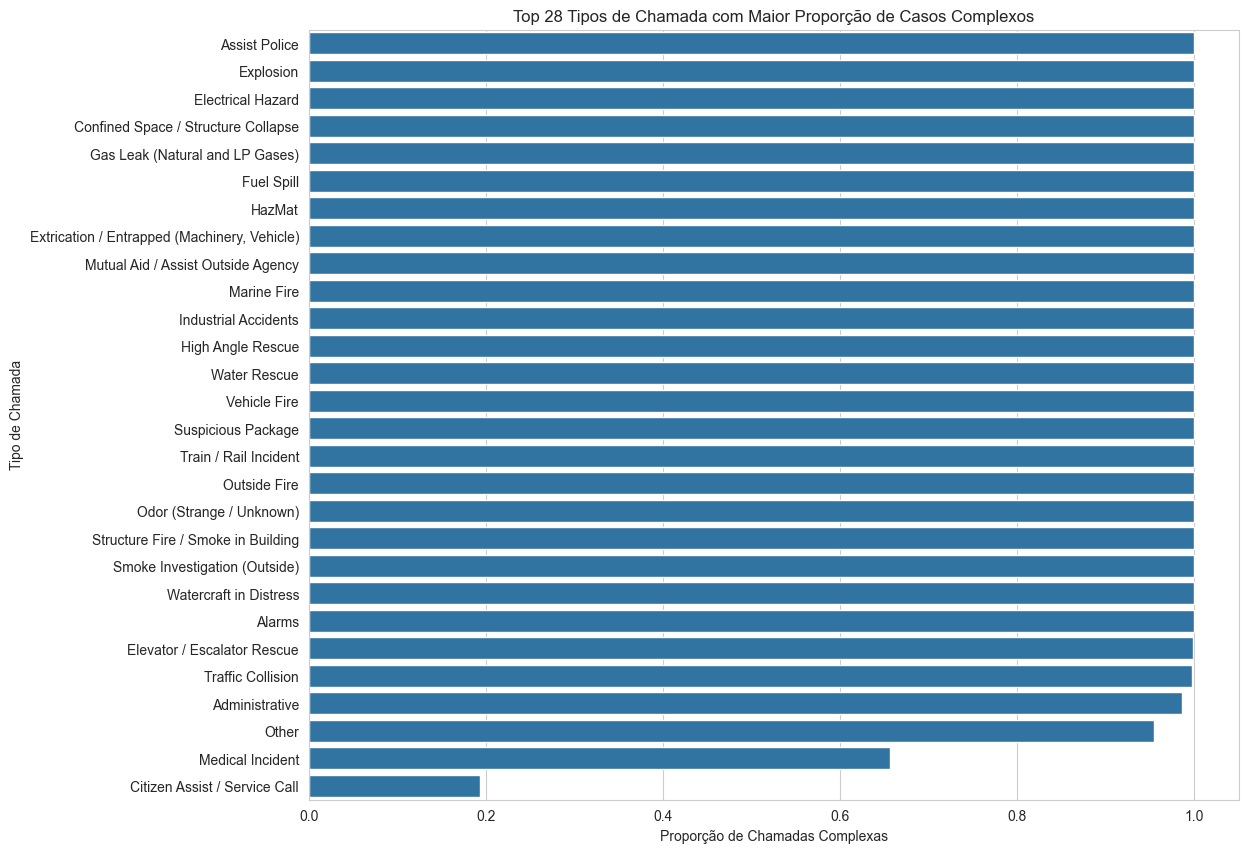

In [121]:
# An√°lise: Tipos de Chamada mais complexos
# Calcular a propor√ß√£o de chamadas complexas para cada tipo de chamada

complexity_by_type = df_processed.groupby('Call Type')['Complexity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(y=complexity_by_type.index[:], x=complexity_by_type.values[:], orient='h')
plt.title(f'Top {len(complexity_by_type)} Tipos de Chamada com Maior Propor√ß√£o de Casos Complexos')
plt.xlabel('Propor√ß√£o de Chamadas Complexas')
plt.ylabel('Tipo de Chamada')
plt.show()

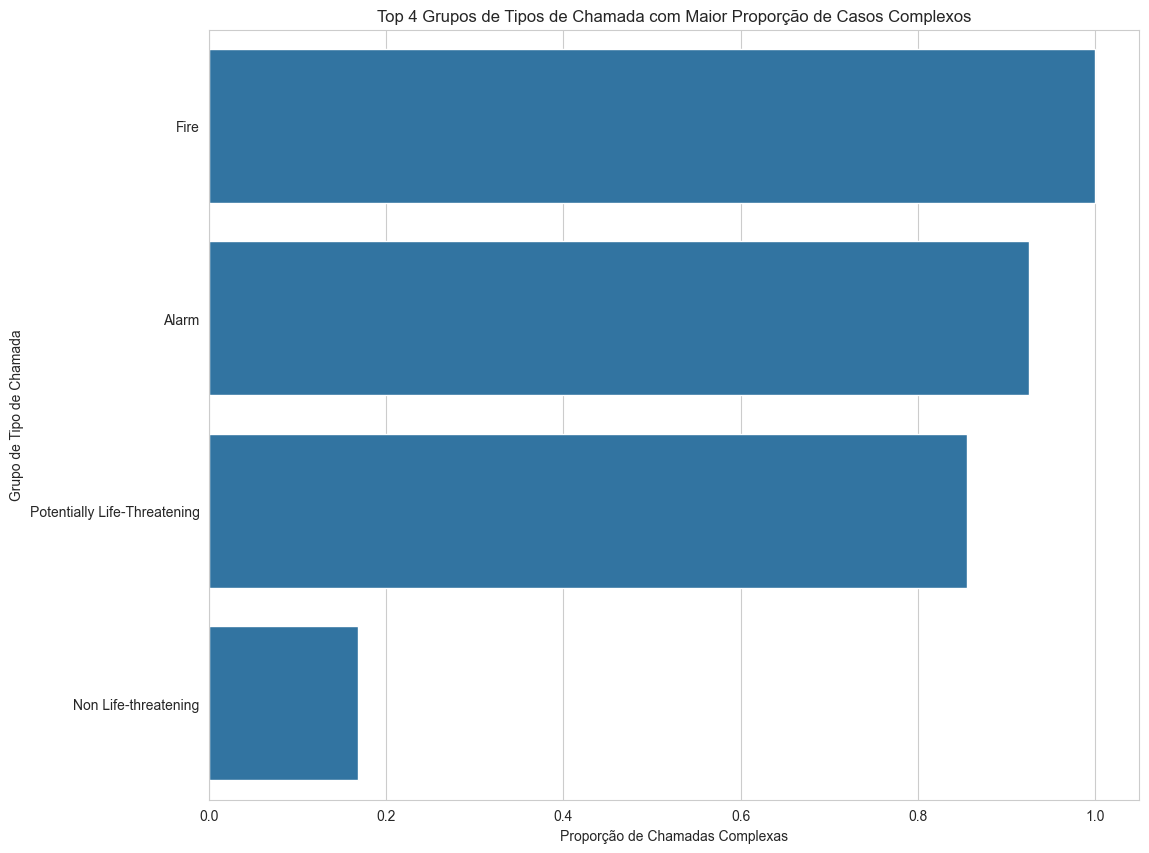

In [122]:
# An√°lise: Grupos de Tipos de Chamada mais complexos
# Calcular a propor√ß√£o de chamadas complexas para cada tipo de chamada

complexity_by_type = df_processed.groupby('Call Type Group')['Complexity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 10))
sns.barplot(y=complexity_by_type.index[:], x=complexity_by_type.values[:], orient='h')
plt.title(f'Top {len(complexity_by_type)} Grupos de Tipos de Chamada com Maior Propor√ß√£o de Casos Complexos')
plt.xlabel('Propor√ß√£o de Chamadas Complexas')
plt.ylabel('Grupo de Tipo de Chamada')
plt.show()

# 4. Pr√© processamento

## Prepara√ß√£o para o Modelo - Codifica√ß√£o e Divis√£o

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import joblib

print("Preparando dados para modelagem (vers√£o final com features iniciais)...")

# 1. Definir Features (X) e Alvo (y)
# Estas s√£o as features que o chatbot pode inferir no in√≠cio da chamada.
categorical_features = ['Call Type', 'Call Type Group']
numerical_features = ['Original Priority'] # Usando a prioridade INICIAL
X = df_processed[categorical_features + numerical_features]
y = df_processed['Complexity']

# 2. Criar o pr√©-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough'
)

# 3. Dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 4. Aplicar o pr√©-processador
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Salvar o pr√©-processador final
joblib.dump(preprocessor, 'feature_preprocessor_final.pkl')

print("Pr√©-processador final salvo em 'feature_preprocessor_final.pkl'")
print(f"X_train_processed: {X_train_processed.shape}, y_train: {y_train.shape}")
print(f"X_test_processed: {X_test_processed.shape}, y_test: {y_test.shape}")

Preparando dados para modelagem (vers√£o final com features iniciais)...
Pr√©-processador final salvo em 'feature_preprocessor_final.pkl'
X_train_processed: (134453, 32), y_train: (134453,)
X_test_processed: (57624, 32), y_test: (57624,)


# 5. Framework de Otimiza√ß√£o de Modelos

Para encontrar a melhor solu√ß√£o, vamos criar um experimento estruturado para comparar diferentes abordagens.

**1. Algoritmos a serem testados:**
* **Regress√£o Log√≠stica:** Um √≥timo baseline, r√°pido e interpret√°vel.
* **Random Forest:** O nosso melhor modelo da rodada anterior, agora com tuning.
* **LightGBM:** Um modelo de Gradient Boosting de alta performance, geralmente superior ao Random Forest em dados tabulares.

**2. T√©cnicas de Balanceamento:**
* **Oversampling (SMOTE):** Cria dados sint√©ticos da classe minorit√°ria.
* **Undersampling (RandomUnderSampler):** Remove aleatoriamente dados da classe majorit√°ria.

**3. Otimiza√ß√£o de Hiperpar√¢metros:**
* Usaremos **`RandomizedSearchCV`**, que √© mais eficiente que o `GridSearchCV`. Ele testar√° um n√∫mero fixo de combina√ß√µes de hiperpar√¢metros aleatoriamente, encontrando √≥timas solu√ß√µes em menos tempo.
* A m√©trica de otimiza√ß√£o ser√° o **`f1_macro`**, que busca um bom equil√≠brio entre precis√£o e recall para ambas as classes.

## Configura√ß√£o dos Modelos, Par√¢metros e Pipelines

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV

# Dicion√°rio com os modelos que vamos testar
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1)
}

# Dicion√°rio com as grades de hiperpar√¢metros para cada modelo
params = {
    'Logistic Regression': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_leaf': [1, 2, 4],
        'classifier__class_weight': ['balanced', None]
    }
}

# T√©cnicas de balanceamento
samplers = {
    'SMOTE (Oversampling)': SMOTE(random_state=42),
    'RandomUnderSampler': RandomUnderSampler(random_state=42)
}

print("Configura√ß√£o do experimento finalizada.")

Configura√ß√£o do experimento finalizada.


## Execu√ß√£o da Valida√ß√£o Cruzada e Tuning

In [125]:
import pandas as pd
from sklearn.metrics import f1_score

results_list = []

# Iterar sobre cada modelo e cada t√©cnica de balanceamento
for model_name, model in models.items():
    for sampler_name, sampler in samplers.items():
        print(f"--- Rodando: {model_name} com {sampler_name} ---")
        
        # 1. Criar o pipeline: primeiro o balanceamento, depois o classificador
        pipeline = ImbPipeline(steps=[('sampler', sampler),
                                      ('classifier', model)])
        
        # 2. Configurar a busca de hiperpar√¢metros com valida√ß√£o cruzada
        search = RandomizedSearchCV(
            pipeline,
            param_distributions=params[model_name],
            n_iter=10,
            cv=3,
            scoring='f1_macro',
            random_state=42,
            n_jobs=-1,
            verbose=1
        )
        
        # 3. Executar a busca nos dados j√° pr√©-processados
        search.fit(X_train_processed, y_train)
        
        # 4. Salvar os resultados
        results_list.append({
            'Model': model_name,
            'Sampler': sampler_name,
            'Best Score (f1_macro)': search.best_score_,
            'Best Params': search.best_params_
        })

# Criar um DataFrame com os resultados
df_results = pd.DataFrame(results_list).sort_values(by='Best Score (f1_macro)', ascending=False)

print("\n--- FIM DO EXPERIMENTO ---")

--- Rodando: Logistic Regression com SMOTE (Oversampling) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
--- Rodando: Logistic Regression com RandomUnderSampler ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
--- Rodando: Random Forest com SMOTE (Oversampling) ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits
--- Rodando: Random Forest com RandomUnderSampler ---
Fitting 3 folds for each of 10 candidates, totalling 30 fits

--- FIM DO EXPERIMENTO ---


# 6. Avalia√ß√£o de Modelos

## An√°lise dos Resultados do Tuning

In [126]:
print("--- Tabela Comparativa dos Resultados da Valida√ß√£o Cruzada ---")
display(df_results)

# Extrair o melhor resultado geral
best_overall_result = df_results.iloc[0]
best_model_name = best_overall_result['Model']
best_sampler_name = best_overall_result['Sampler']
best_params = best_overall_result['Best Params']

print(f"\nüèÜ Melhor Combina√ß√£o Encontrada üèÜ")
print(f"Modelo: {best_model_name}")
print(f"T√©cnica de Balanceamento: {best_sampler_name}")
print(f"Melhor pontua√ß√£o (f1_macro na valida√ß√£o): {best_overall_result['Best Score (f1_macro)']:.4f}")
print(f"Melhores Hiperpar√¢metros: {best_params}")

--- Tabela Comparativa dos Resultados da Valida√ß√£o Cruzada ---


Model               Sampler  Best Score (f1_macro)  \
2        Random Forest  SMOTE (Oversampling)                   0.91   
3        Random Forest    RandomUnderSampler                   0.91   
1  Logistic Regression    RandomUnderSampler                   0.91   
0  Logistic Regression  SMOTE (Oversampling)                   0.91   

                                         Best Params  
2  {'classifier__n_estimators': 50, 'classifier__...  
3  {'classifier__n_estimators': 100, 'classifier_...  
1  {'classifier__solver': 'liblinear', 'classifie...  
0  {'classifier__solver': 'liblinear', 'classifie...


üèÜ Melhor Combina√ß√£o Encontrada üèÜ
Modelo: Random Forest
T√©cnica de Balanceamento: SMOTE (Oversampling)
Melhor pontua√ß√£o (f1_macro na valida√ß√£o): 0.9061
Melhores Hiperpar√¢metros: {'classifier__n_estimators': 50, 'classifier__min_samples_leaf': 1, 'classifier__max_depth': 20, 'classifier__class_weight': 'balanced'}


## Avalia√ß√£o do Melhor Modelo no Conjunto de Teste

--- Relat√≥rio de Classifica√ß√£o Final para: Random Forest com SMOTE (Oversampling) ---
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     14035
           1       0.97      0.93      0.95     43589

    accuracy                           0.93     57624
   macro avg       0.89      0.93      0.90     57624
weighted avg       0.93      0.93      0.93     57624



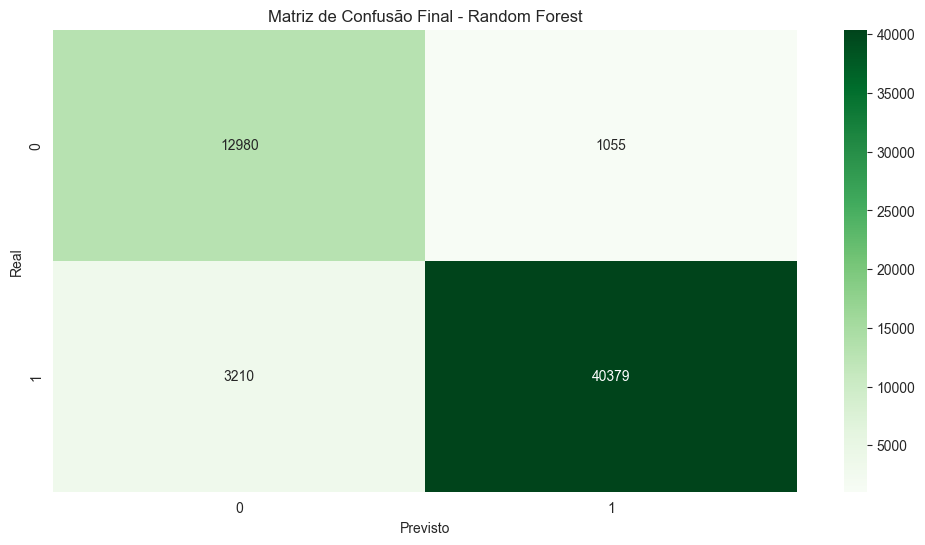

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

# 1. Configurar o pipeline final com os melhores componentes e par√¢metros
final_model = models[best_model_name]
final_sampler = samplers[best_sampler_name]

# Remover o prefixo 'classifier__' dos nomes dos par√¢metros
cleaned_params = {key.replace('classifier__', ''): value for key, value in best_params.items()}
final_model.set_params(**cleaned_params)

final_pipeline = ImbPipeline(steps=[('sampler', final_sampler),
                                    ('classifier', final_model)])

# 2. Treinar o modelo final em TODOS os dados de treino (j√° pr√©-processados)
final_pipeline.fit(X_train_processed, y_train)

# 3. Fazer previs√µes no conjunto de teste (j√° pr√©-processado)
y_pred_final = final_pipeline.predict(X_test_processed)

# 4. Avaliar a performance final
print(f"--- Relat√≥rio de Classifica√ß√£o Final para: {best_model_name} com {best_sampler_name} ---")
print(classification_report(y_test, y_pred_final))

# Matriz de Confus√£o
cm_final = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens')
plt.title(f'Matriz de Confus√£o Final - {best_model_name}')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

# 7. Conclus√£o e Exporta√ß√£o do Modelo

In [128]:
# 6. Salvar o modelo final
# IMPORTANTE: Salvaremos a pipeline final, que sabe balancear e classificar.
# O pr√©-processador ('feature_preprocessor.pkl') tamb√©m deve ser guardado.
joblib.dump(final_pipeline, 'best_classifier_pipeline.pkl')
print("\n‚úÖ Pipeline final (sampler + classifier) salva com sucesso como 'best_classifier_pipeline.pkl'")
print("Lembre-se de usar tamb√©m o 'feature_preprocessor.pkl' salvo anteriormente ao usar o modelo.")


‚úÖ Pipeline final (sampler + classifier) salva com sucesso como 'best_classifier_pipeline.pkl'
Lembre-se de usar tamb√©m o 'feature_preprocessor.pkl' salvo anteriormente ao usar o modelo.


Iniciando busca pelo limiar √≥timo...

üèÜ Melhor Limiar Encontrado: 0.20
   Com F1-Score (macro avg) de: 0.9101

--- Relat√≥rio de Classifica√ß√£o Final com Limiar Otimizado ---
              precision    recall  f1-score   support

           0       0.84      0.89      0.87     14035
           1       0.96      0.95      0.96     43589

    accuracy                           0.93     57624
   macro avg       0.90      0.92      0.91     57624
weighted avg       0.93      0.93      0.93     57624



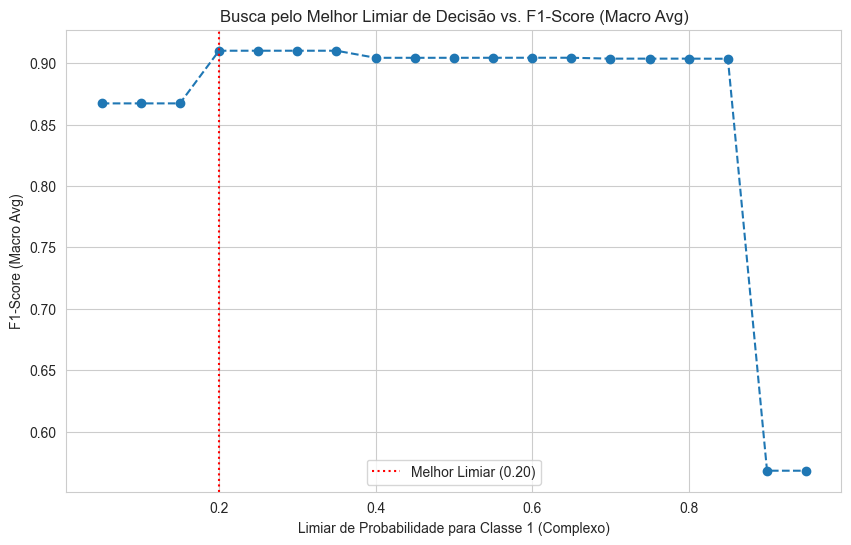

In [129]:
import joblib
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

# 1. Carregar o melhor pipeline treinado e o pr√©-processador
final_pipeline = joblib.load('best_classifier_pipeline.pkl')
# N√£o precisamos carregar o preprocessor aqui, pois j√° temos os dados processados

print("Iniciando busca pelo limiar √≥timo...")

# 2. Obter as probabilidades para o conjunto de teste J√Å PROCESSADO
# --- CORRE√á√ÉO AQUI ---
# Usamos X_test_processed em vez de X_test
y_pred_probs = final_pipeline.predict_proba(X_test_processed)[:, 1]

# 3. Encontrar o melhor limiar testando v√°rios valores
thresholds = np.arange(0.05, 1.0, 0.05)
f1_scores = []

for thresh in thresholds:
    y_pred_tuned = (y_pred_probs >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_tuned, average='macro')
    f1_scores.append(f1)

# Encontrar o limiar que maximizou o F1-Score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

print(f"\nüèÜ Melhor Limiar Encontrado: {best_threshold:.2f}")
print(f"   Com F1-Score (macro avg) de: {best_f1_score:.4f}")

# 4. Avaliar o modelo final com o limiar otimizado
y_pred_final_tuned = (y_pred_probs >= best_threshold).astype(int)

print("\n--- Relat√≥rio de Classifica√ß√£o Final com Limiar Otimizado ---")
print(classification_report(y_test, y_pred_final_tuned))

# 5. Visualizar a busca pelo melhor limiar
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, marker='o', linestyle='--')
plt.title('Busca pelo Melhor Limiar de Decis√£o vs. F1-Score (Macro Avg)')
plt.xlabel('Limiar de Probabilidade para Classe 1 (Complexo)')
plt.ylabel('F1-Score (Macro Avg)')
plt.axvline(best_threshold, color='r', linestyle=':', label=f'Melhor Limiar ({best_threshold:.2f})')
plt.legend()
plt.grid(True)
plt.show()